## Net Neutrality Contributions
We'll be exploring a data set on our representatives, their voting position on Net Neutrality, and contributions they've received from telecoms. A few initial questions we'll explore:
+ How much money has each party received?
+ How are votes distributed by political party?
+ Which position sees the most contributions?
+ How representatives from same states paid? Similar regardless of voting position?
+ How much have the sponsors of the bill received?


net neutrality resolution: https://www.congress.gov/bill/115th-congress/senate-joint-resolution/34

data source: https://www.kaggle.com/theriley106/net-neutrality-accountability/data

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from locale import currency # for pretty currency conversions

In [3]:
nn = pd.read_json("nnDataSet.json")
nn = nn.transpose() # Each row is a representative.

## Data overview:

In [4]:
nn.info()

<class 'pandas.core.frame.DataFrame'>
Index: 535 entries, Adam Kinzinger to Zoe Lofgren
Data columns (total 5 columns):
Contributions    535 non-null object
Party            535 non-null object
Position         535 non-null object
State            535 non-null object
Vote             535 non-null object
dtypes: object(5)
memory usage: 45.1+ KB


In [5]:
nn.head()

,Contributions,Party,Position,State,Vote
Adam Kinzinger,"$383,383",Republican,House of Representatives,IL,Yes
Adam Schiff,"$221,824",Democrat,House of Representatives,CA,No
Adam Smith,"$186,158",Democrat,House of Representatives,WA,No
Adrian Smith,"$165,834",Republican,House of Representatives,NE,Yes
Adriano Espaillat,"$13,300",Democrat,House of Representatives,NY,No


In [61]:
# The indexes are the representatives names. Let's add a column with those names so 
nn['Name'] = nn.index

In [62]:
nn.head(3)

,Contributions,Party,Position,State,Vote,Name
Adam Kinzinger,383383,Republican,House of Representatives,IL,Yes,Adam Kinzinger
Adam Schiff,221824,Democrat,House of Representatives,CA,No,Adam Schiff
Adam Smith,186158,Democrat,House of Representatives,WA,No,Adam Smith


In [6]:
nn.describe()

,Contributions,Party,Position,State,Vote
count,535,535,535,535,535
unique,509,3,2,50,3
top,"$26,000",Republican,House of Representatives,CA,Yes
freq,3,293,435,56,221


In [7]:
# Remove $ from contributions and convert the string into an int. 
nn['Contributions'] = nn['Contributions'].replace({'\$': '', ',': ''}, regex=True)
nn['Contributions'] = pd.to_numeric(nn.Contributions)

Now that the 'Contributions' field is an int, we can ask some numeric questions.

In [56]:
nn[nn['Contributions'] == nn.Contributions.min()]

,Contributions,Party,Position,State,Vote
Warren Davidson,15,Republican,House of Representatives,OH,No


Ouch. Bad data or someone got hazed...

## How much money has each party received?

In [44]:
dems = nn[nn['Party'] == 'Democrat']
reps = nn[nn['Party'] == 'Republican']
d_money = dems['Contributions'].sum()
r_money = reps['Contributions'].sum()
print("Total contributions to Democrats:   ${:0,.0f} \nTotal contributions to Republicans: ${:0,.0f}".format(d_money, r_money))

Total contributions to Democrats:   $45,004,252 
Total contributions to Republicans: $55,805,224


In [49]:
# Statistics are from the Contributions column as it's the only numeric one
nn.groupby(['Party']).describe()

Contributions                                                    \
                   count           mean            std      min        25%   
Party                                                                        
Democrat           240.0  187517.716667  234236.759685   1040.0   51162.50   
I                    2.0  183461.500000  157630.364982  72000.0  127730.75   
Republican         293.0  190461.515358  278271.559957     15.0   36000.00   

                                            
                 50%        75%        max  
Party                                       
Democrat    107645.0  225091.75  1692749.0  
I           183461.5  239192.25   294923.0  
Republican  103600.0  220500.00  2554784.0

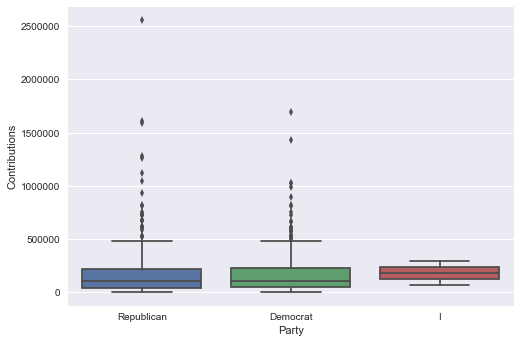

In [53]:
sns.boxplot(x="Party", y="Contributions", data=nn)
plt.show()

Big outlier in Republican party... Who is it?

In [55]:
nn[nn['Contributions'] == nn.Contributions.max()]

,Contributions,Party,Position,State,Vote
John McCain,2554784,Republican,US Senate,AZ,Unknown


+ Republican Party seeing about 10 million more than the Democratic Party. 
+ John McCain is a big outlier getting 2.5 million. Maybe he has more pull on a related sub committee? 

## Position by party:

In [54]:
nn.groupby(['Party', 'Vote']).size()

Party       Vote   
Democrat    No         182
            Unknown     54
            Yes          4
I           Unknown      1
            Yes          1
Republican  No          17
            Unknown     60
            Yes        216
dtype: int64

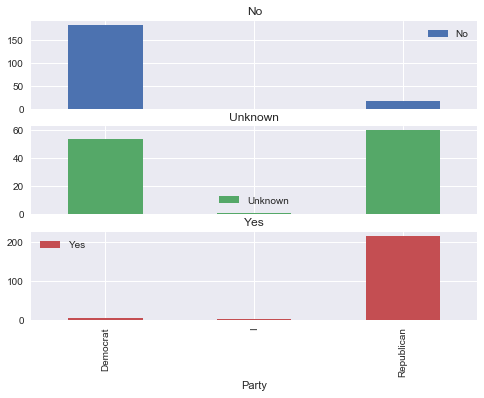

In [79]:
nn.groupby(['Party', 'Vote']).size().unstack().plot(kind='bar', subplots=True)
plt.show()

+ Republicans are primarily for the bill.
+ Democrats mostly against the bill.

## Contributions by party

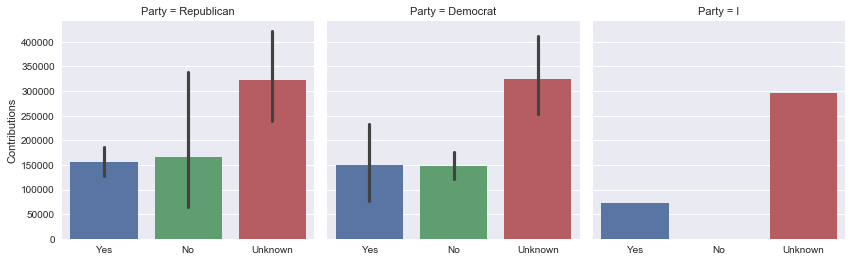

In [91]:
fg = sns.factorplot(x='Vote', y='Contributions', 
                        col='Party', data=nn, kind='bar')
fg.set_xlabels('')
plt.show()

+ In all the parties, the unknowns get the highest contributions. Playing hard to get?
+ Democrats have a lower mean than Republicans. 

## Contributions by voting position:

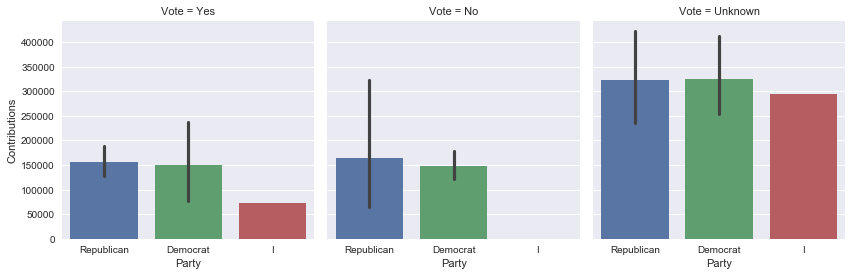

In [47]:
fg = sns.factorplot(x='Party', y='Contributions', 
                        col='Vote', data=nn, kind='bar')
plt.show()

+ Unknowns get the most in contributions. Followed by Republicans voting No. This is ineresting because the majority of Republicans vote Yes. 

## Breakdown by state and showing contributions to each representative in the state. Blues are yes votes, Greens are no, Red is undecided.

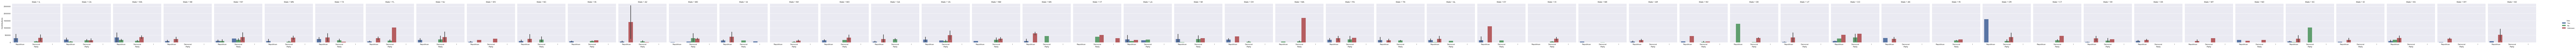

In [52]:
fg = sns.factorplot(x='Party', y='Contributions', hue='Vote',
                        col='State', data=nn, kind='bar')
plt.show()

+ Representatives with unknown voting position often receive the most in contributions. This is seen in the state breakdown as well as in the contributions by party and position.

## Cosponsors of the bill:

In [86]:
# Pulled from the bills site linked to at the beginning
cosponsors = ['Ron Johnson', 'John Barrasso', 'Roy Blunt', 'John Boozman', 'Thad Cochran', 'John Cornyn', 'Tom Cotton',
             'Ted Cruz', 'Deb Fischer', 'Orrin Hatch', 'Dean Heller', 'James Inhofe', 'Mike Lee', 'Rand Paul', 'Pat Roberts',
             'Marco Rubio', 'Richard Shelby', 'Dan Sullivan', 'John Thune', 'Roger Wicker', 'Jerry Moran', 'Mitch McConnell',
             'Mike Rounds']

In [79]:
nn_cosponsors = nn.loc[cosponsors]

In [80]:
nn_cosponsors

,Contributions,Party,Position,State,Vote,Name
Ron Johnson,242730,Republican,US Senate,LA,Yes,Ron Johnson
John Barrasso,311200,Republican,US Senate,WY,Unknown,John Barrasso
Roy Blunt,1283416,Republican,US Senate,DE,No,Roy Blunt
John Boozman,228050,Republican,US Senate,AR,Unknown,John Boozman
Thad Cochran,516280,Republican,US Senate,MS,Unknown,Thad Cochran
John Cornyn,622125,Republican,US Senate,TX,Unknown,John Cornyn
Tom Cotton,177660,Republican,US Senate,AR,Unknown,Tom Cotton
Ted Cruz,322505,Republican,US Senate,TX,Unknown,Ted Cruz
Deb Fischer,381550,Republican,US Senate,NE,Unknown,Deb Fischer
Orrin Hatch,677830,Republican,US Senate,UT,Unknown,Orrin Hatch


In [81]:
nn_cosponsors['Contributions'].mean()

458685.26086956525

In [84]:
# All the non cosponsors of the bill and their combined mean
nn[~nn.index.isin(nn_cosponsors.index)].Contributions.mean()

177005.15234375

+ Cosponsors of the bill see a mean contribution of \$458,685. 
+ Non cosponsors have a mean of \$177,005.
+ Cosponsors getting a mean 2.5 times more than non cosponsors of the bill.
+ Almost all of the cosponsors have an unknown voting position.
+ All cosponsors of the bill are Republican. 

## Conclusions and summary:
The data here was taken from a Kaggle post (link in the intro) and the analysis was done after the net neutrality vote in December 2017. Due to this, we may be dealing with incomplete information in this analysis. With that being a possibility, we still see some interesting trends in the data.
There's a clear split between the two parties as well as a disparity in the contributions to those parties. We saw cosponsors of the bill receiving 2.5 times the mean contribution value of non cosponsors. 
It'd be worth researching into John McCain's role in net neutrality as he was a huge outlier in conributions receiving over 2.5 million.